In [1]:
import numpy as np  
import pandas as pd  

import matplotlib.pyplot as plt  
import seaborn as sns  
import scipy.stats as stats  

from sklearn.model_selection import train_test_split  
from feature_engine.outliers import Winsorizer  

In [2]:
df = pd.read_csv('../artifacts/data_ingestion/clothesDataset.csv')

In [3]:
transDf = df.copy()

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# Data preprocessing 

In [5]:
# Variance 
for col in transDf.select_dtypes(exclude = 'object').columns:
    print(col, df[col].var())

Sales 7.975625808897243
CompPrice 235.1472431077694
Income 783.218239348371
Advertising 44.227343358395984
Population 21719.813934837093
Price 560.5844360902256
Age 262.4496177944862
Education 6.867167919799499


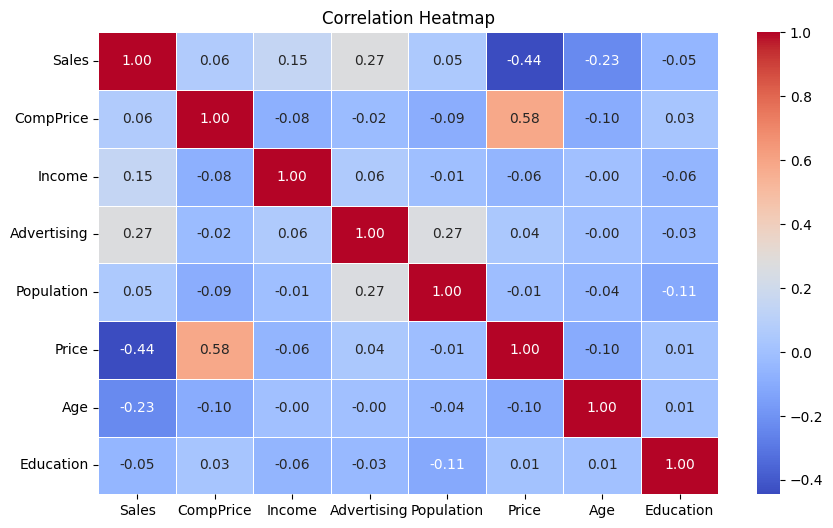

In [6]:
# any corelation between two columns

plt.figure(figsize=(10, 6))
sns.heatmap(transDf.corr(numeric_only = True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show() # no correlation

In [7]:
# outliers treatment 

outliers = Winsorizer(tail = 'both', capping_method = 'iqr', fold = 1.5, variables = ['Price', 'CompPrice', 'Sales'])

In [8]:
transDf[['Price', 'CompPrice', 'Sales']] = outliers.fit_transform(df[['Price', 'CompPrice', 'Sales']])

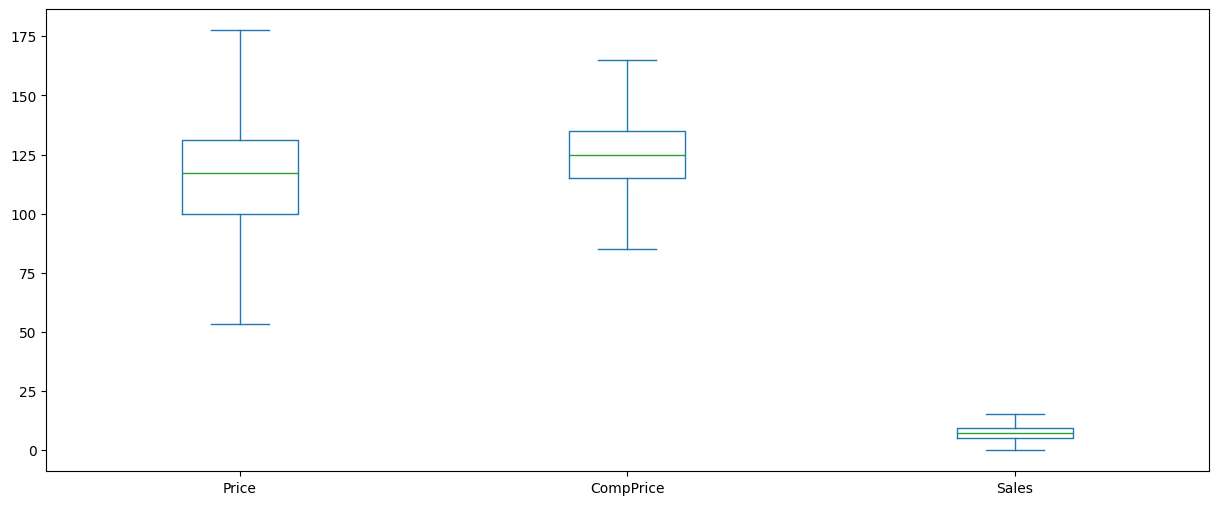

In [9]:
# check the outliers

transDf[['Price', 'CompPrice', 'Sales']].plot(kind = 'box', figsize = (15, 6))
plt.show()

In [10]:
# Binning 

# change the target variable to binning high and low

df[['Sales']].head()

,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15


<Axes: ylabel='Sales'>

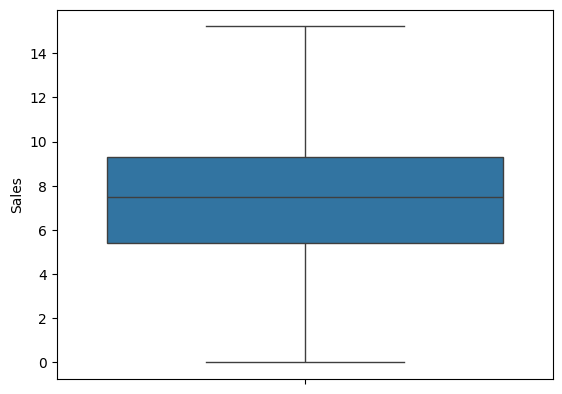

In [11]:
sns.boxplot(transDf['Sales'])

In [12]:
transDf['Sales'] = pd.qcut(transDf['Sales'], q=2, labels=['Low', 'High'])

In [13]:
# values counts is balance or imbalanced 

transDf['Sales'].value_counts(normalize=True) * 100

Sales
Low     50.25
High    49.75
Name: proportion, dtype: float64

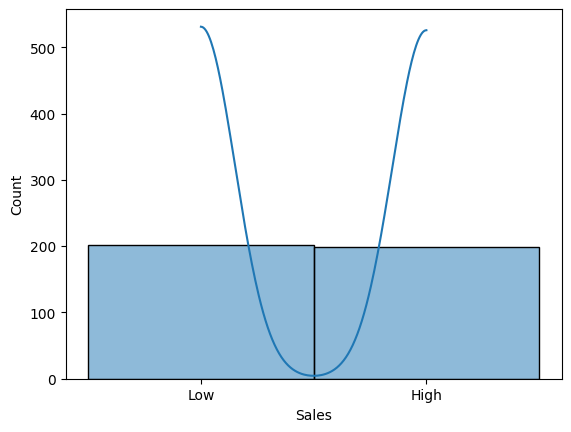

In [14]:
sns.histplot(transDf['Sales'], kde=True)
plt.show()

In [15]:
# one hot encoding 

transDf.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120.0,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83.0,Good,65,10,Yes,Yes
2,High,113,35,10,269,80.0,Medium,59,12,Yes,Yes
3,Low,117,100,4,466,97.0,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128.0,Bad,38,13,Yes,No


In [16]:
transDf = pd.get_dummies(transDf, drop_first = True).astype(int)

In [17]:
transDf.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_High,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,1,0,0,1,1
1,111,48,16,260,83,65,10,1,1,0,1,1
2,113,35,10,269,80,59,12,1,0,1,1,1
3,117,100,4,466,97,55,14,0,0,1,1,1
4,141,64,3,340,128,38,13,0,0,0,1,0


In [18]:
# rename the Sales_High to target 
transDf.rename(columns={'Sales_High': 'target'}, inplace=True)

In [20]:
transDf.to_csv("./preprocessedData/cleanData.csv", index = False)